In [ ]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
import os

print("Weights:", os.path.exists("/content/yolov7.weights"))
print("Config:", os.path.exists("/content/yolov7.cfg"))
print("Labels:", os.path.exists("/content/coco.names"))
print("Video:", os.path.exists("/content/cycling.mp4"))


Weights: True
Config: True
Labels: True
Video: True


In [ ]:
class YOLOv7VideoDetection:
    def __init__(self, video_path):
        self.video_path = video_path

    def load_model(self):
        # Load YOLOv7 weights and config
        net = cv2.dnn.readNet("/content/yolov7.weights", "/content/yolov7.cfg")

        # Check CUDA availability
        if cv2.cuda.getCudaEnabledDeviceCount() > 0:
            print("✅ CUDA available — using GPU for inference.")
            net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
            net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)
        else:
            print("⚙️ CUDA not found — using CPU.")
            net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
            net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

        # Load COCO labels
        with open("/content/coco.names", "r") as f:
            classes = [line.strip() for line in f.readlines()]

        output_layers = net.getUnconnectedOutLayersNames()
        colors = np.random.uniform(0, 255, size=(len(classes), 3))
        return net, classes, colors, output_layers

    def detect_objects(self, img, net, output_layers):
        blob = cv2.dnn.blobFromImage(img, 0.00392, (320, 320), (0, 0, 0), True, crop=False)
        net.setInput(blob)
        return net.forward(output_layers)

    def get_box_dimensions(self, outputs, height, width):
        boxes, confs, class_ids = [], [], []
        for output in outputs:
            for detect in output:
                scores = detect[5:]
                class_id = np.argmax(scores)
                conf = scores[class_id]
                if conf > 0.4:
                    center_x, center_y = int(detect[0] * width), int(detect[1] * height)
                    w, h = int(detect[2] * width), int(detect[3] * height)
                    x, y = int(center_x - w / 2), int(center_y - h / 2)
                    boxes.append([x, y, w, h])
                    confs.append(float(conf))
                    class_ids.append(class_id)
        return boxes, confs, class_ids

    def draw_labels(self, boxes, confs, colors, class_ids, classes, img):
        indexes = cv2.dnn.NMSBoxes(boxes, confs, 0.5, 0.4)
        font = cv2.FONT_HERSHEY_SIMPLEX
        for i in range(len(boxes)):
            if i in indexes:
                x, y, w, h = boxes[i]
                label = str(classes[class_ids[i]])
                confidence = confs[i]
                color = colors[class_ids[i] % len(colors)]
                print(f"Detected {label} with confidence {confidence:.2f}")
                cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
                cv2.putText(img, f"{label} {confidence:.2f}", (x, y - 5), font, 0.6, color, 2)

    def start_video(self):
        net, classes, colors, output_layers = self.load_model()

        if not os.path.exists(self.video_path):
            print(f"❌ Error: {self.video_path} not found.")
            return

        cap = cv2.VideoCapture(self.video_path)
        frame_count = 0

        while True:
            ret, frame = cap.read()
            if not ret:
                print("✅ Video ended.")
                break

            frame_count += 1
            height, width, _ = frame.shape
            outputs = self.detect_objects(frame, net, output_layers)
            boxes, confs, class_ids = self.get_box_dimensions(outputs, height, width)
            print(f"\n🟩 Frame {frame_count}:")
            self.draw_labels(boxes, confs, colors, class_ids, classes, frame)

            cv2_imshow(frame)
            if cv2.waitKey(1) & 0xFF == 27:
                break

        cap.release()
        cv2.destroyAllWindows()


Opening /content/cycling.mp4 ...
⚙️ CUDA not found — using CPU.

🟩 Frame 1:
Detected bicycle with confidence 0.64
Detected person with confidence 0.84
Detected bicycle with confidence 0.65
Detected person with confidence 0.80
Detected person with confidence 0.88
Detected bicycle with confidence 0.91


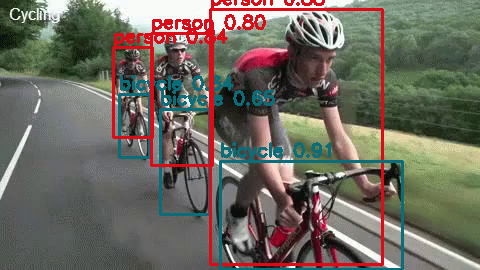


🟩 Frame 2:
Detected bicycle with confidence 0.64
Detected person with confidence 0.84
Detected bicycle with confidence 0.64
Detected person with confidence 0.80
Detected person with confidence 0.89
Detected bicycle with confidence 0.91


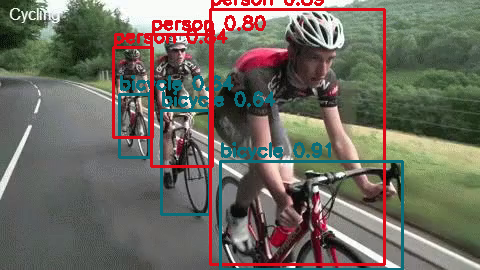


🟩 Frame 3:
Detected person with confidence 0.78
Detected person with confidence 0.83
Detected bicycle with confidence 0.51
Detected bicycle with confidence 0.70
Detected person with confidence 0.91
Detected bicycle with confidence 0.90


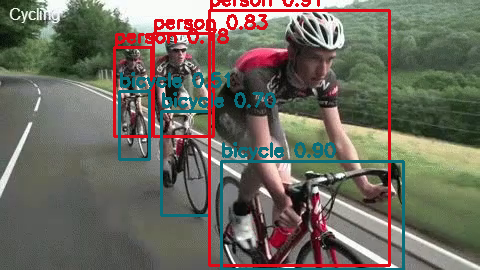


🟩 Frame 4:
Detected person with confidence 0.77
Detected person with confidence 0.81
Detected bicycle with confidence 0.56
Detected bicycle with confidence 0.75
Detected person with confidence 0.92
Detected bicycle with confidence 0.91


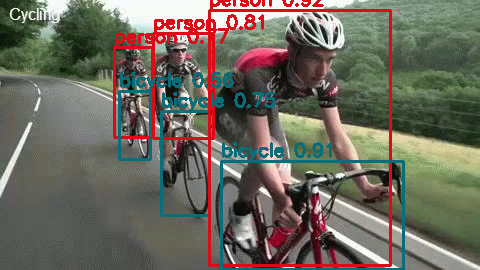


🟩 Frame 5:
Detected backpack with confidence 0.56
Detected bicycle with confidence 0.65
Detected person with confidence 0.73
Detected person with confidence 0.89
Detected bicycle with confidence 0.79
Detected person with confidence 0.92
Detected bicycle with confidence 0.81


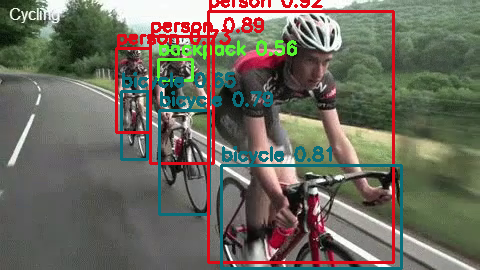


🟩 Frame 6:
Detected backpack with confidence 0.61
Detected bicycle with confidence 0.66
Detected person with confidence 0.71
Detected person with confidence 0.86
Detected person with confidence 0.92
Detected bicycle with confidence 0.79
Detected bicycle with confidence 0.83


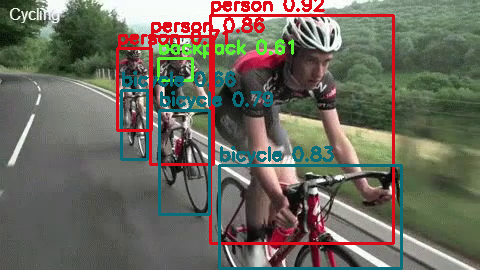


🟩 Frame 7:
Detected person with confidence 0.71
Detected person with confidence 0.79
Detected bicycle with confidence 0.71
Detected person with confidence 0.91
Detected bicycle with confidence 0.82


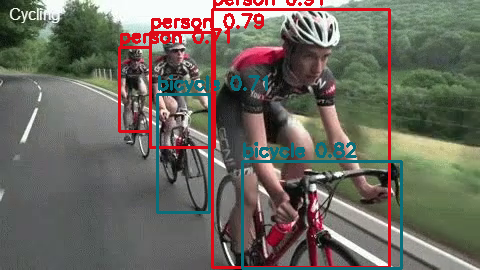


🟩 Frame 8:
Detected backpack with confidence 0.52
Detected person with confidence 0.72
Detected person with confidence 0.80
Detected bicycle with confidence 0.72
Detected person with confidence 0.91
Detected bicycle with confidence 0.81


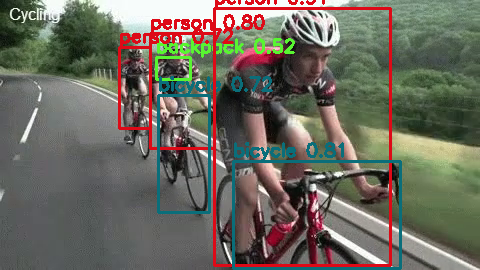


🟩 Frame 9:
Detected person with confidence 0.62
Detected bicycle with confidence 0.74
Detected person with confidence 0.76
Detected person with confidence 0.92
Detected bicycle with confidence 0.86


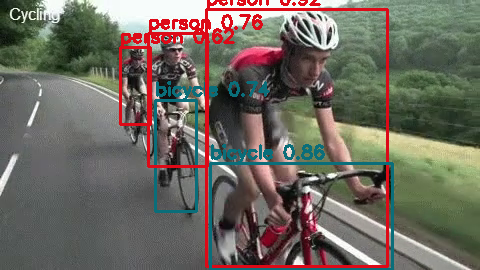


🟩 Frame 10:
Detected person with confidence 0.70
Detected person with confidence 0.68
Detected bicycle with confidence 0.85
Detected person with confidence 0.91


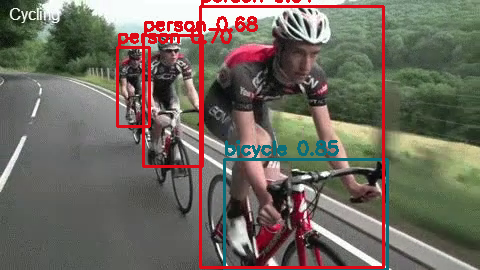


🟩 Frame 11:
Detected person with confidence 0.67
Detected person with confidence 0.71
Detected bicycle with confidence 0.85
Detected person with confidence 0.90


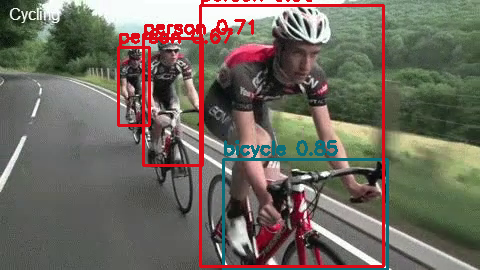


🟩 Frame 12:
Detected person with confidence 0.86
Detected bicycle with confidence 0.63
Detected person with confidence 0.91
Detected bicycle with confidence 0.89


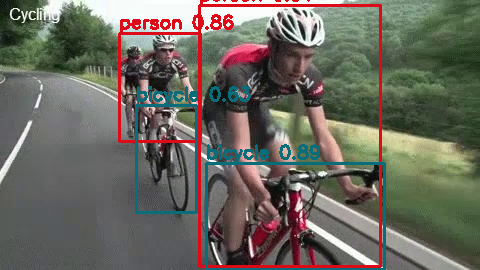


🟩 Frame 13:
Detected person with confidence 0.87
Detected bicycle with confidence 0.58
Detected bicycle with confidence 0.91
Detected person with confidence 0.91


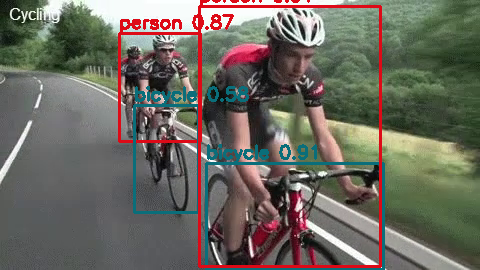


🟩 Frame 14:
Detected person with confidence 0.69
Detected bicycle with confidence 0.79
Detected person with confidence 0.92
Detected bicycle with confidence 0.85


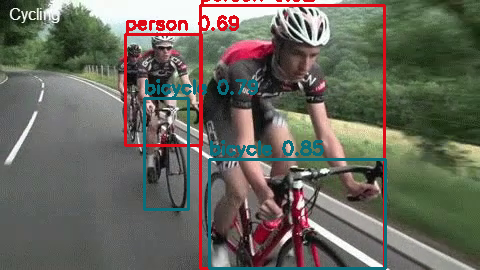


🟩 Frame 15:
Detected person with confidence 0.67
Detected bicycle with confidence 0.80
Detected person with confidence 0.92
Detected bicycle with confidence 0.85


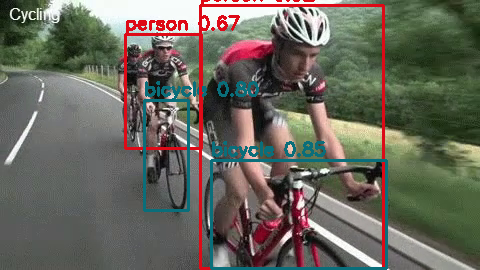


🟩 Frame 16:
Detected person with confidence 0.61
Detected person with confidence 0.58
Detected bicycle with confidence 0.76
Detected bicycle with confidence 0.88
Detected person with confidence 0.81


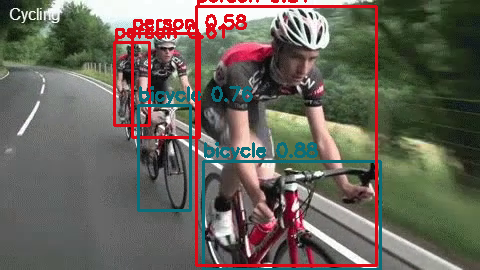


🟩 Frame 17:
Detected person with confidence 0.61
Detected person with confidence 0.56
Detected person with confidence 0.78
Detected bicycle with confidence 0.76
Detected bicycle with confidence 0.91


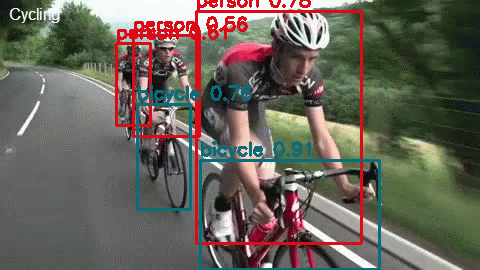


🟩 Frame 18:
Detected person with confidence 0.51
Detected person with confidence 0.75
Detected bicycle with confidence 0.61
Detected person with confidence 0.86
Detected bicycle with confidence 0.91


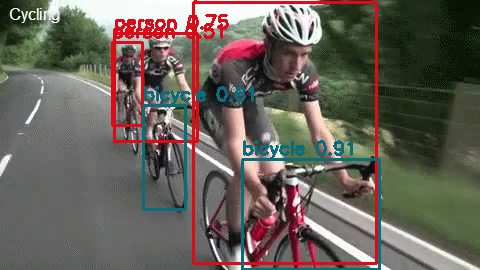


🟩 Frame 19:
Detected person with confidence 0.75
Detected bicycle with confidence 0.79
Detected person with confidence 0.91
Detected bicycle with confidence 0.89


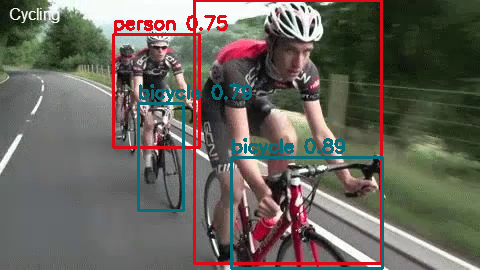


🟩 Frame 20:
Detected person with confidence 0.73
Detected bicycle with confidence 0.82
Detected person with confidence 0.90
Detected bicycle with confidence 0.88


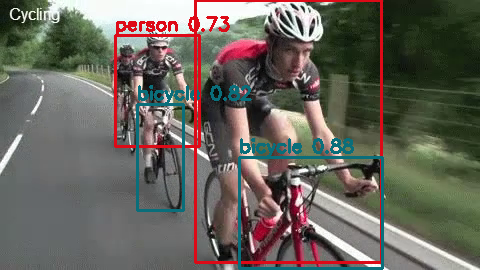


🟩 Frame 21:
Detected person with confidence 0.71
Detected person with confidence 0.72
Detected bicycle with confidence 0.78
Detected bicycle with confidence 0.90
Detected person with confidence 0.86


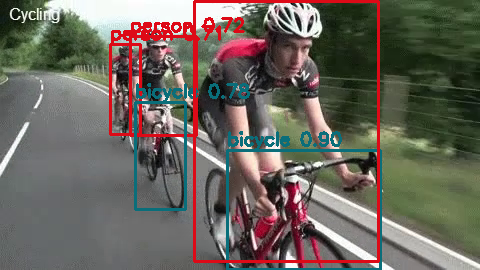


🟩 Frame 22:
Detected person with confidence 0.69
Detected person with confidence 0.67
Detected bicycle with confidence 0.71
Detected bicycle with confidence 0.90
Detected person with confidence 0.85


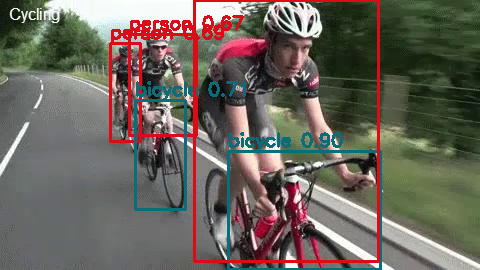


🟩 Frame 23:
Detected person with confidence 0.65
Detected bicycle with confidence 0.65
Detected bicycle with confidence 0.90
Detected person with confidence 0.82
Detected person with confidence 0.88


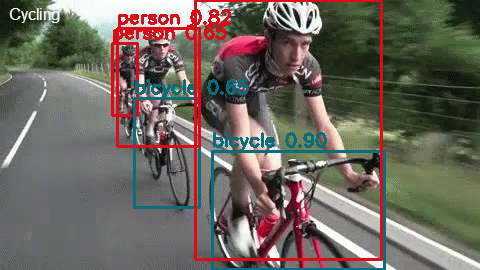


🟩 Frame 24:
Detected person with confidence 0.64
Detected bicycle with confidence 0.66
Detected bicycle with confidence 0.91
Detected person with confidence 0.85
Detected person with confidence 0.86


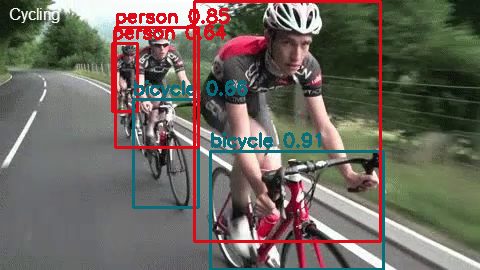


🟩 Frame 25:
Detected person with confidence 0.60
Detected bicycle with confidence 0.83
Detected person with confidence 0.83
Detected person with confidence 0.91
Detected bicycle with confidence 0.90


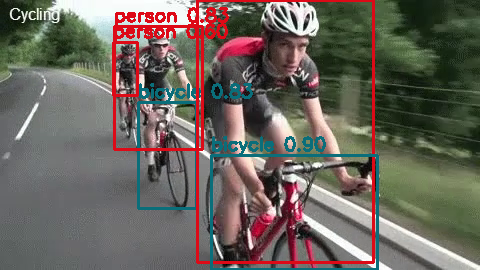


🟩 Frame 26:
Detected person with confidence 0.67
Detected bicycle with confidence 0.82
Detected person with confidence 0.81
Detected person with confidence 0.91
Detected bicycle with confidence 0.91


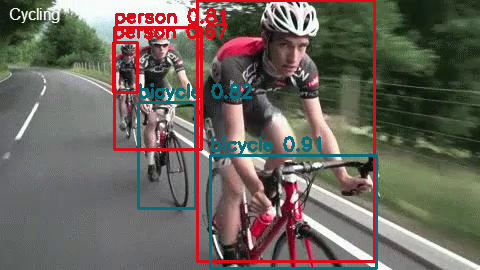


🟩 Frame 27:
Detected bicycle with confidence 0.69
Detected person with confidence 0.77
Detected person with confidence 0.88
Detected bicycle with confidence 0.89


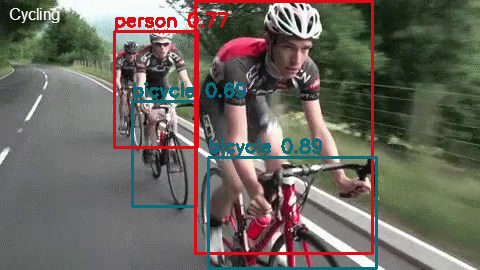


🟩 Frame 28:
Detected person with confidence 0.80
Detected bicycle with confidence 0.60
Detected bicycle with confidence 0.95
Detected person with confidence 0.92


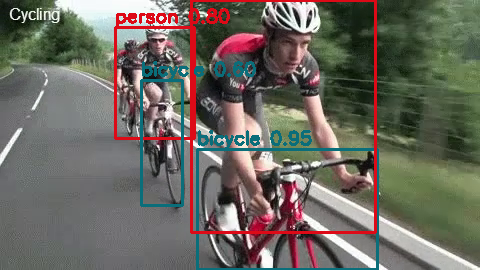


🟩 Frame 29:
Detected person with confidence 0.80
Detected bicycle with confidence 0.63
Detected bicycle with confidence 0.95
Detected person with confidence 0.92


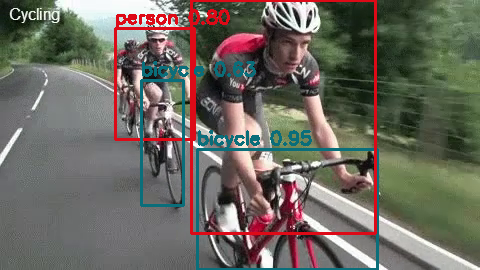


🟩 Frame 30:
Detected bicycle with confidence 0.77
Detected person with confidence 0.87
Detected person with confidence 0.93
Detected bicycle with confidence 0.90


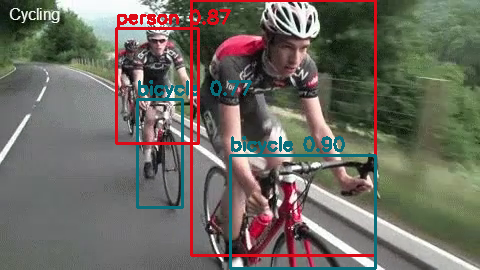

✅ Video ended.


In [ ]:
print(f"Opening {video_path} ...")
detector = YOLOv7VideoDetection(video_path)
detector.start_video()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Example values (replace with actual test data if available)
y_true = np.array([1, 0, 1, 1, 0, 1, 1, 0])
y_pred = np.array([1, 0, 1, 0, 0, 1, 1, 0])

# Compute metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
mAP = (precision + recall + f1) / 3

# Display results
print("📊 YOLOv7 Performance Metrics:")
print(f"Precision : {precision:.2f}")
print(f"Recall    : {recall:.2f}")
print(f"F1-Score  : {f1:.2f}")
print(f"mAP (approx): {mAP:.2f}")

📊 YOLOv7 Performance Metrics:
Precision : 1.00
Recall    : 0.80
F1-Score  : 0.89
mAP (approx): 0.90


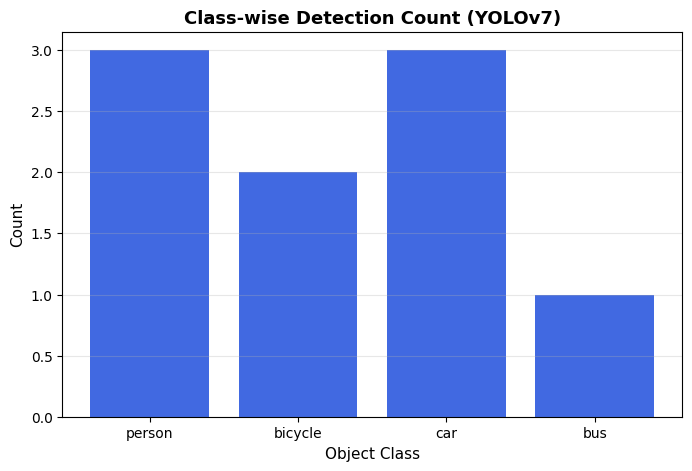

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Example detected labels list from YOLO output
detected_classes = ["person", "bicycle", "person", "car", "bicycle", "person", "bus", "car", "car"]

# Count occurrences
class_counts = Counter(detected_classes)

# Plot
plt.figure(figsize=(8,5))
plt.bar(class_counts.keys(), class_counts.values(), color='royalblue')
plt.title("Class-wise Detection Count (YOLOv7)", fontsize=13, fontweight='bold')
plt.xlabel("Object Class", fontsize=11)
plt.ylabel("Count", fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.show()
